# Credit Card Approval 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## Data Preparation

In [3]:
#import data
cc_data= pd.read_csv ('cc_data_randomized.csv')


In [4]:
#find missing data
cc_data.isna().sum()

Gender             0
Age                0
Debt               1
Married            0
BankCustomer       0
EducationLevel     1
Ethnicity          0
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            2
ZipCode           19
Income             0
ApprovalStatus     0
dtype: int64

In [5]:
#drop the ZipCode column because it has so many missing values
cc_data.drop('ZipCode', axis=1, inplace=True)

In [6]:
# Drop rows with missing values
cc_data.dropna(inplace=True)

In [7]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 1 to 299
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          296 non-null    object 
 1   Age             296 non-null    int64  
 2   Debt            296 non-null    float64
 3   Married         296 non-null    object 
 4   BankCustomer    296 non-null    object 
 5   EducationLevel  296 non-null    object 
 6   Ethnicity       296 non-null    object 
 7   YearsEmployed   296 non-null    float64
 8   PriorDefault    296 non-null    object 
 9   Employed        296 non-null    object 
 10  CreditScore     296 non-null    int64  
 11  DriversLicense  296 non-null    object 
 12  Citizen         296 non-null    object 
 13  Income          296 non-null    float64
 14  ApprovalStatus  296 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 37.0+ KB


In [8]:
#Map binary categories to numerical values for machine learning compatibility
cc_data['Gender'] = cc_data['Gender'].map({'Male': 1, 'Female': 0})
cc_data['Married'] = cc_data['Married'].map({'Yes': 1, 'No': 0})
cc_data['BankCustomer'] = cc_data['BankCustomer'].map({'Yes': 1, 'No': 0})
cc_data['PriorDefault'] = cc_data['PriorDefault'].map({'Yes': 1, 'No': 0})
cc_data['Employed'] = cc_data['Employed'].map({'Yes': 1, 'No': 0})
cc_data['DriversLicense'] = cc_data['DriversLicense'].map({'Yes': 1, 'No': 0})
cc_data['Citizen'] = cc_data['Citizen'].map({'US': 1, 'Non-US': 0})
cc_data['ApprovalStatus']= cc_data['ApprovalStatus'].map ({'Approved':1, 'Denied':0 })



In [9]:
#Create column and calculate the debt to income ratio
cc_data["DebtToIncomeRatio"] = cc_data["Debt"] / cc_data["Income"]

In [10]:
#Review data types to detemrine which are objects
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 1 to 299
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             296 non-null    int64  
 1   Age                296 non-null    int64  
 2   Debt               296 non-null    float64
 3   Married            296 non-null    int64  
 4   BankCustomer       296 non-null    int64  
 5   EducationLevel     296 non-null    object 
 6   Ethnicity          296 non-null    object 
 7   YearsEmployed      296 non-null    float64
 8   PriorDefault       296 non-null    int64  
 9   Employed           296 non-null    int64  
 10  CreditScore        296 non-null    int64  
 11  DriversLicense     296 non-null    int64  
 12  Citizen            296 non-null    int64  
 13  Income             296 non-null    float64
 14  ApprovalStatus     296 non-null    int64  
 15  DebtToIncomeRatio  296 non-null    float64
dtypes: float64(4), int64(10), objec

## Exploring Trends in Loan Approval Outcomes

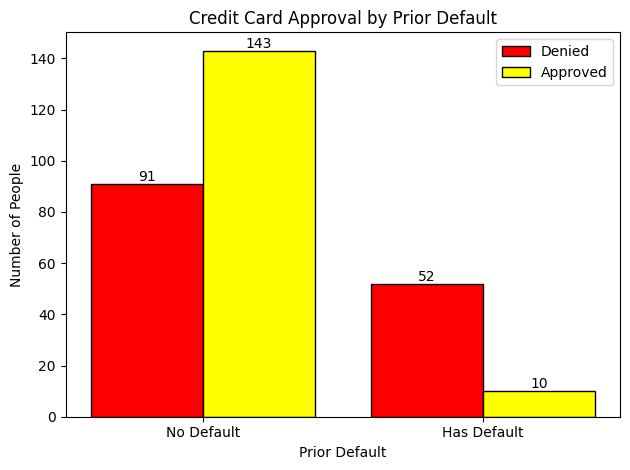

In [11]:
import matplotlib.pyplot as plt

# Group data by PriorDefault and ApprovalStatus
grouped_data = cc_data.groupby(["PriorDefault", "ApprovalStatus"]).size().unstack(fill_value=0)

# Create the bar chart
fig, ax = plt.subplots()

# Define x positions
x = [0, 1]  # 0: No prior default, 1: Yes prior default

# Plot bars for 'Denied' (ApprovalStatus = 0) and 'Approved' (ApprovalStatus = 1)
bar_width = 0.4  # Set the width of each bar
bars1= ax.bar([pos - bar_width / 2 for pos in x], grouped_data[0], width=bar_width, label="Denied", color="red", edgecolor="black")
bars2= ax.bar([pos + bar_width / 2 for pos in x], grouped_data[1], width=bar_width, label="Approved", color= "yellow", edgecolor="black")

# Add labels and title
ax.set_xlabel("Prior Default")
ax.set_ylabel("Number of People")
ax.set_title("Credit Card Approval by Prior Default")
ax.set_xticks(x)
ax.set_xticklabels(["No Default", "Has Default"])
ax.legend()

# Add numbers on top of each bar
for bar in bars1:  # For Denied bars
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha="center", va="bottom")
    
for bar in bars2:  # For Approved bars
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha="center", va="bottom")
# Show the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


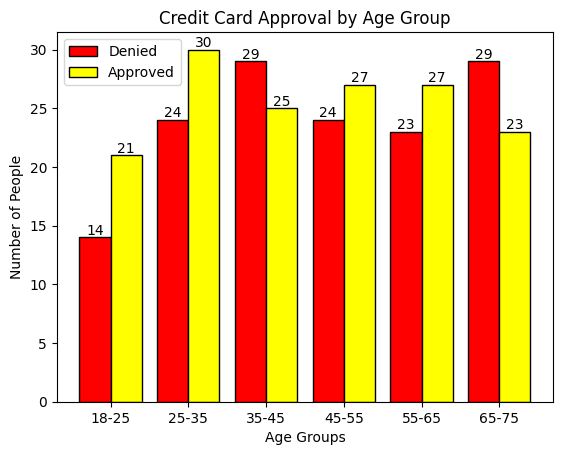

In [12]:
# Define age bins and labels
bins = [18, 25, 35, 45, 55, 65, 75, 80]
labels = ["18-25", "25-35", "35-45", "45-55", "55-65", "65-75", "75-80"]

# Create age groups
cc_data["AgeGroup"] = pd.cut(cc_data["Age"], bins=bins, labels=labels, right=False)

# Group by AgeGroup and ApprovalStatus, and count occurrences
grouped_data = cc_data.groupby(["AgeGroup", "ApprovalStatus"],observed=True ).size().unstack(fill_value=0)

# Extract data for plotting
x = grouped_data.index.tolist()  # Age groups (e.g., '18-25', '25-35')
denied = grouped_data[0].tolist()  # Counts for Denied (ApprovalStatus = 0)
approved = grouped_data[1].tolist()  # Counts for Approved (ApprovalStatus = 1)

# Define bar width
bar_width = 0.4

# Calculate bar positions
x_positions = range(len(x))  # Integer positions for each age group
x1 = [pos - bar_width / 2 for pos in x_positions]  # Offset for 'Denied'
x2 = [pos + bar_width / 2 for pos in x_positions]  # Offset for 'Approved'

# Create the bar chart
fig, ax = plt.subplots()
bars1=ax.bar(x1, denied, width=bar_width, label="Denied", color="red",  edgecolor="black")
bars2=ax.bar(x2, approved, width=bar_width, label="Approved", color="yellow", edgecolor="black")

# Add labels and title
ax.set_xlabel("Age Groups")
ax.set_ylabel("Number of People")
ax.set_title("Credit Card Approval by Age Group")
ax.set_xticks(x_positions)
ax.set_xticklabels(x)  # Use age group labels
ax.legend()

# Add numbers on top of each bar
for bar in bars1:  # For Denied bars
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha="center", va="bottom")
    
for bar in bars2:  # For Approved bars
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha="center", va="bottom")
plt.show()


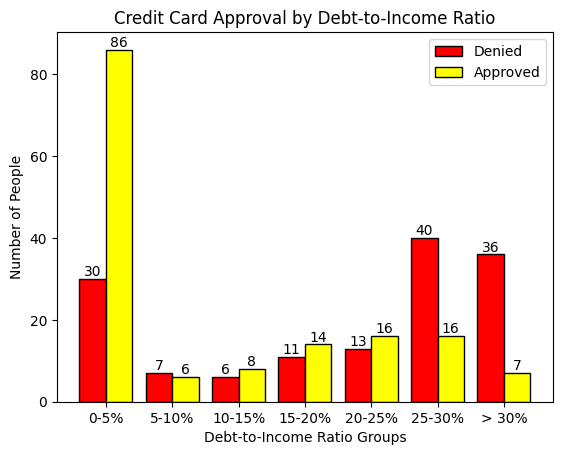

In [13]:
bins = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, float("inf")]  # Up to 30% and above
labels = ["0-5%", "5-10%", "10-15%", "15-20%", "20-25%", "25-30%", "> 30%"]

# Create ratio groups
cc_data["RatioGroup"] = pd.cut(cc_data["DebtToIncomeRatio"], bins=bins, labels=labels, right=False)

# Group by RatioGroup and ApprovalStatus, and count occurrences
grouped_data = cc_data.groupby(["RatioGroup", "ApprovalStatus"], observed=False).size().unstack(fill_value=0)

# Extract data for plotting
x = grouped_data.index.tolist()  # Ratio groups (e.g., '0-20%', '20-40%')
denied = grouped_data[0].tolist()  # Counts for Denied (ApprovalStatus = 0)
approved = grouped_data[1].tolist()  # Counts for Approved (ApprovalStatus = 1)

# Define bar width
bar_width = 0.4

# Calculate bar positions
x_positions = range(len(x))  # Integer positions for each ratio group
x1 = [pos - bar_width / 2 for pos in x_positions]  # Offset for 'Denied'
x2 = [pos + bar_width / 2 for pos in x_positions]  # Offset for 'Approved'

# Create the bar chart
fig, ax = plt.subplots()
bars1= ax.bar(x1, denied, width=bar_width, label="Denied", color="red", edgecolor="black")
bars2= ax.bar(x2, approved, width=bar_width, label="Approved", color="yellow", edgecolor="black")

# Add labels and title
ax.set_xlabel("Debt-to-Income Ratio Groups")
ax.set_ylabel("Number of People")
ax.set_title("Credit Card Approval by Debt-to-Income Ratio")
ax.set_xticks(x_positions)
ax.set_xticklabels(x)
ax.legend()
# Add numbers on top of each bar
for bar in bars1:  # For Denied bars
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha="center", va="bottom")
    
for bar in bars2:  # For Approved bars
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha="center", va="bottom")

plt.show()

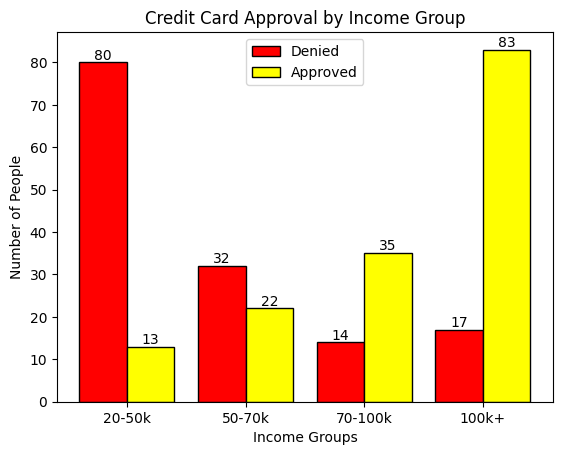

In [14]:
# Define income bins and labels
bins = [0, 20000, 50000, 70000, 100000, float("inf")]  # Specified income ranges
labels = ["<20k", "20-50k", "50-70k", "70-100k", "100k+"]

# Create income groups
cc_data["IncomeGroup"] = pd.cut(cc_data["Income"], bins=bins, labels=labels, right=False)

# Group by IncomeGroup and ApprovalStatus, and count occurrences
grouped_data = cc_data.groupby(["IncomeGroup", "ApprovalStatus"], observed=True).size().unstack(fill_value=0)

# Extract data for plotting
x = grouped_data.index.tolist()  # Income groups (e.g., '0-20k', '20-50k')
denied = grouped_data[0].tolist()  # Counts for Denied (ApprovalStatus = 0)
approved = grouped_data[1].tolist()  # Counts for Approved (ApprovalStatus = 1)

# Define bar width
bar_width = 0.4

# Calculate bar positions
x_positions = range(len(x))  # Integer positions for each income group
x1 = [pos - bar_width / 2 for pos in x_positions]  # Offset for 'Denied'
x2 = [pos + bar_width / 2 for pos in x_positions]  # Offset for 'Approved'

# Create the bar chart
fig, ax = plt.subplots()
bars1= ax.bar(x1, denied, width=bar_width, label="Denied", color="red", edgecolor="black")
bars2= ax.bar(x2, approved, width=bar_width, label="Approved",color="yellow", edgecolor="black")

# Add labels and title
ax.set_xlabel("Income Groups")
ax.set_ylabel("Number of People")
ax.set_title("Credit Card Approval by Income Group")
ax.set_xticks(x_positions)
ax.set_xticklabels(x)
ax.legend()

# Add numbers on top of each bar
for bar in bars1:  # For Denied bars
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha="center", va="bottom")
    
for bar in bars2:  # For Approved bars
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha="center", va="bottom")
plt.show()

In [15]:
cc_data

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,ApprovalStatus,DebtToIncomeRatio,AgeGroup,RatioGroup,IncomeGroup
1,0,61,0.00,1,1,PhD,Hispanic,29.9,0,1,826,1,1,187733.03,1,0.000000,55-65,0-5%,100k+
2,0,27,23269.07,0,0,Graduate,Hispanic,2.2,0,1,820,1,1,116345.34,1,0.200000,25-35,20-25%,100k+
3,0,29,18471.23,1,1,College,Hispanic,0.8,0,1,417,1,1,61570.76,0,0.300000,25-35,> 30%,50-70k
4,1,73,15480.40,0,1,College,Hispanic,46.9,0,1,610,1,1,51601.35,0,0.300000,65-75,25-30%,50-70k
5,1,73,26277.55,1,1,Graduate,Black,25.7,0,1,681,1,1,102517.82,1,0.256322,65-75,25-30%,100k+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,37,31348.49,0,1,Graduate,Black,0.0,0,1,735,0,1,104494.96,1,0.300000,35-45,> 30%,100k+
296,0,27,35546.16,1,1,Graduate,Asian,0.0,1,1,666,1,1,118487.19,0,0.300000,25-35,> 30%,100k+
297,1,22,24437.97,0,0,PhD,White,1.2,0,1,810,1,1,122189.86,1,0.200000,18-25,15-20%,100k+
298,1,52,1131.00,0,1,PhD,Other,0.0,0,1,778,1,1,174424.28,1,0.006484,45-55,0-5%,100k+


In [16]:
# Create X by dropping unwanted columns
x = cc_data.drop(columns=["ApprovalStatus", "AgeGroup", "RatioGroup", "IncomeGroup"], errors="ignore")

# Create y
y = cc_data["ApprovalStatus"]

## Random Forest Model: Training and Feature Analysis

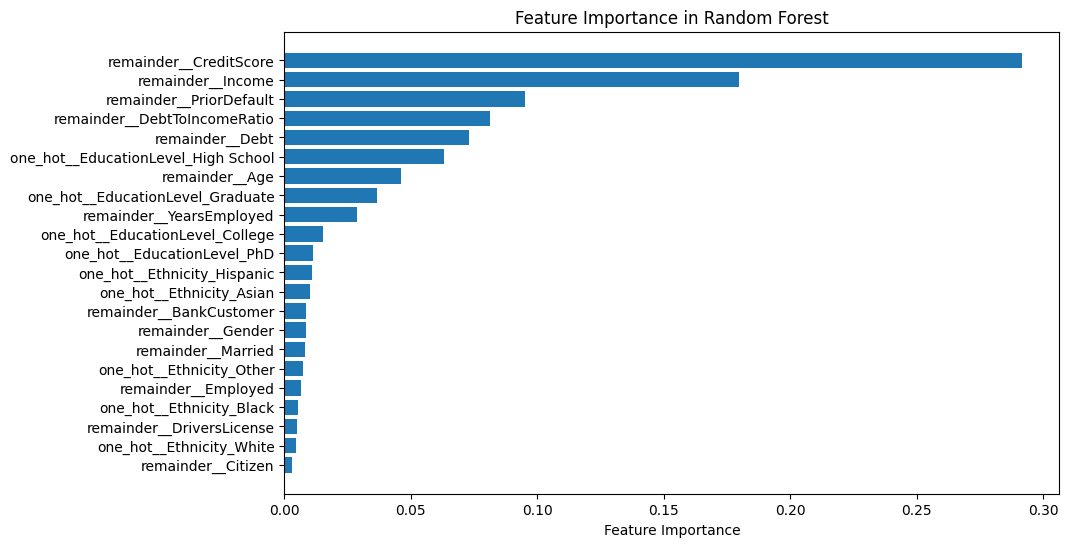

In [17]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Define categorical features and set up one-hot encoding
categorical_features = ["EducationLevel", "Ethnicity"]
one_hot = OneHotEncoder()

# Create a ColumnTransformer to handle one-hot encoding
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)], remainder="passthrough"
)

# Transform the data and convert it to a DataFrame with feature names
transformed_x = transformer.fit_transform(x)
feature_names = transformer.get_feature_names_out()
transformed_x_df = pd.DataFrame(transformed_x, columns=feature_names)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    transformed_x_df, y, test_size=0.3, random_state=42
)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Plot feature importance
importances = model.feature_importances_
sorted_indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh([feature_names[i] for i in sorted_indices], importances[sorted_indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.show()



## Evaluating the model

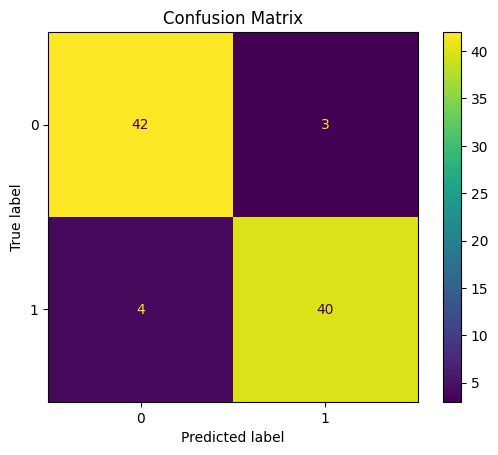

In [18]:
# Confusion matrix for the model with DebtToIncomeRatio
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


In [19]:
# Print model accuracy
print(f"Model accuracy: {model.score(x_test, y_test)*100:.2f}%")


Model accuracy: 92.13%


In [20]:
y.value_counts()

ApprovalStatus
1    153
0    143
Name: count, dtype: int64

Accuracy: 92.13%
Precision: 0.93
Recall: 0.91
F1 Score: 0.92
ROC AUC Score: 0.96


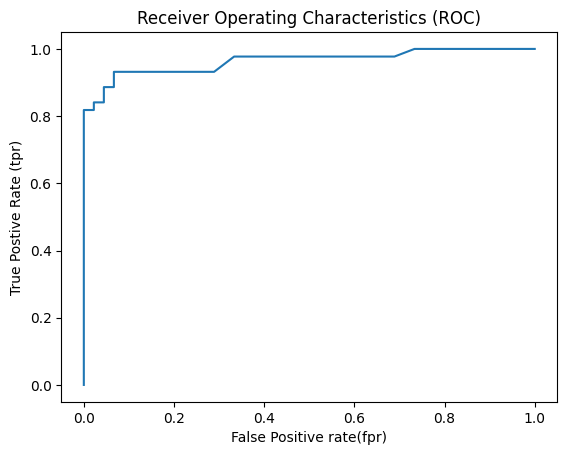

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

fpr, tpr ,threshholds= roc_curve(y_test, model.predict_proba(x_test)[:, 1])

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive rate(fpr)")
    plt.ylabel("True Postive Rate (tpr)")
    plt.title ("Receiver Operating Characteristics (ROC)")
    plt.show()

plot_roc_curve(fpr,tpr)


## Improving Model Performance Through Hyperparameter Tuning

In [40]:

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None],
    'max_features': ['sqrt', 'log2', None], 
    'min_samples_split': [6],
    'min_samples_leaf': [1, 2]
}

# Set up the GridSearchCV
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=10,             # 5-fold cross-validation
    verbose=1,        # Print the progress
    scoring='accuracy' # Use accuracy as the evaluation metric
)

# Fit the grid search to the training data
grid.fit(x_train, y_train)

# Output the best parameters and cross-validation score
print(f"The best parameter values are: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_ * 100:.2f}%")

# Retrieve the best model and evaluate it on the test set
best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)
test_score = accuracy_score(y_test, y_pred)

print(f"Best model score on the test set: {test_score * 100:.2f}%")



Fitting 10 folds for each of 18 candidates, totalling 180 fits
The best parameter values are: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}
Best cross-validation score: 94.74%
Best model score on the test set: 92.13%


In [41]:
# Extract the best parameters
best_params = grid.best_params_

# Create a new RandomForestClassifier with the best parameters
optimized_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    max_features= best_params['max_features'], 
    min_samples_leaf = best_params['min_samples_leaf'],    
    random_state=42
)

# Train the optimized model on the entire training set
optimized_model.fit(x_train, y_train)

# Evaluate the optimized model
y_pred_optimized = optimized_model.predict(x_test)
test_score_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized model score on the test set: {test_score_optimized * 100:.2f}%")


Optimized model score on the test set: 92.13%


In [42]:
from sklearn.metrics import classification_report


# Classification Report
print("Classification Report without tuning hyperparameters:")
print(classification_report(y_test, y_pred))


# Classification Report
print("Classification Report with tuning hyperparameters:")
print(classification_report(y_test, y_pred_optimized))

roc_auc_original = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
roc_auc_optimized = roc_auc_score(y_test, optimized_model.predict_proba(x_test)[:, 1])

print(f"\nROC-AUC without tuning: {roc_auc_original:.2f}")
print(f"ROC-AUC with tuning: {roc_auc_optimized:.2f}")

Classification Report without tuning hyperparameters:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        45
           1       0.93      0.91      0.92        44

    accuracy                           0.92        89
   macro avg       0.92      0.92      0.92        89
weighted avg       0.92      0.92      0.92        89

Classification Report with tuning hyperparameters:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        45
           1       0.93      0.91      0.92        44

    accuracy                           0.92        89
   macro avg       0.92      0.92      0.92        89
weighted avg       0.92      0.92      0.92        89


ROC-AUC without tuning: 0.96
ROC-AUC with tuning: 0.97


## Interactive Interface for User Input

In [43]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd

# Define dropdown options
dropdown_options = {
    "Gender": ["Male", "Female"],
    "Married": ["Yes", "No"],
    "BankCustomer": ["Yes", "No"],
    "PriorDefault": ["Yes", "No"],
    "Employed": ["Yes", "No"],
    "DriversLicense": ["Yes", "No"],
    "Citizen": ["US", "Non-US"],
}

# Define valid options for one-hot encoded features
valid_education_levels = ["PhD", "Graduate", "College", "High School"]
valid_ethnicities = ["Asian", "Black", "Hispanic", "White", "Other"]

# Define mappings for binary features
mappings = {
    "Gender": {"Male": 1, "Female": 0},
    "Married": {"Yes": 1, "No": 0},
    "BankCustomer": {"Yes": 1, "No": 0},
    "PriorDefault": {"Yes": 1, "No": 0},
    "Employed": {"Yes": 1, "No": 0},
    "DriversLicense": {"Yes": 1, "No": 0},
    "Citizen": {"US": 1, "Non-US": 0},
}

# Create input widgets for each feature
# Create input widgets for each feature
inputs = {}
for feature in x.columns:
    if feature == "Debt" or feature == "Income":  # Include Debt and Income inputs
        inputs[feature] = widgets.FloatText(description=feature, value=0.0, step=0.01)
    elif feature in dropdown_options:  # Handle binary categorical features with dropdowns
        inputs[feature] = widgets.Dropdown(
            description=feature,
            options=dropdown_options[feature],
            value=dropdown_options[feature][0],  # Default to the first option
        )
    elif feature == "EducationLevel":  # Dropdown for EducationLevel
        inputs[feature] = widgets.Dropdown(
            description=feature,
            options=valid_education_levels,
            value=valid_education_levels[0],  # Default to the first option
        )
    elif feature == "Ethnicity":  # Dropdown for Ethnicity
        inputs[feature] = widgets.Dropdown(
            description=feature,
            options=valid_ethnicities,
            value=valid_ethnicities[0],  # Default to the first option
        )
    elif feature != "DebtToIncomeRatio":  # Exclude DebtToIncomeRatio from inputs
        inputs[feature] = widgets.FloatText(description=feature, value=0.0, step=0.01)

# Create a button for prediction
predict_button = widgets.Button(description="Predict", button_style="success")

# Create output widget
output = widgets.Output()

# Define the prediction function
def predict_approval(button):
    with output:
        clear_output()  # Clear previous output

        # Collect inputs
        user_input = {}
        for feature in x.columns:
            if feature in mappings:  # Map binary categorical inputs
                value = inputs[feature].value.strip()  # Use dropdown value directly
                user_input[feature] = mappings[feature][value]
            elif feature == "EducationLevel" or feature == "Ethnicity":  # Categorical inputs via dropdown
                user_input[feature] = inputs[feature].value
            elif feature not in ["DebtToIncomeRatio"]:  # Handle other numeric inputs, exclude DebtToIncomeRatio
                user_input[feature] = inputs[feature].value

        # Dynamically calculate DebtToIncomeRatio
        try:
            debt = user_input["Debt"]
            income = user_input["Income"]
            if income > 0:
                user_input["DebtToIncomeRatio"] = debt / income
                print(f"Debt to Income Ratio: {user_input['DebtToIncomeRatio']:.2f}")
            else:
                print("Income must be greater than 0 to calculate DebtToIncomeRatio.")
                return
        except KeyError:
            print("Both 'Debt' and 'Income' must be provided to calculate DebtToIncomeRatio.")
            return

        # Convert to DataFrame for transformation
        input_df = pd.DataFrame([user_input])

        # Apply one-hot encoding transformation
        transformed_input = transformer.transform(input_df)
        transformed_input_df = pd.DataFrame(transformed_input, columns=transformer.get_feature_names_out())

        # Predict using the trained model
        prediction = optimized_model.predict(transformed_input_df)[0]

        # Display the result
        if prediction == 1:
            print("Result: Approved ✅")
        else:
            print("Result: Denied ❌")

# Bind the function to the button
predict_button.on_click(predict_approval)

# Display the widgets
input_widgets = widgets.VBox(list(inputs.values()) + [predict_button, output])
display(input_widgets)
